<a href="https://colab.research.google.com/github/HenryZumaeta/py4cd_EPC2025/blob/main/C15/C15_Script01_IntroEstadisticaInferencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución Muestral

In [ ]:
# Problema: Si tomo 1000 muestras diferentes de una población y calculo la media
# de cada una, entonces esas 1000 muestras formarían su propia distribución.
# Esa es la distribución muestral.

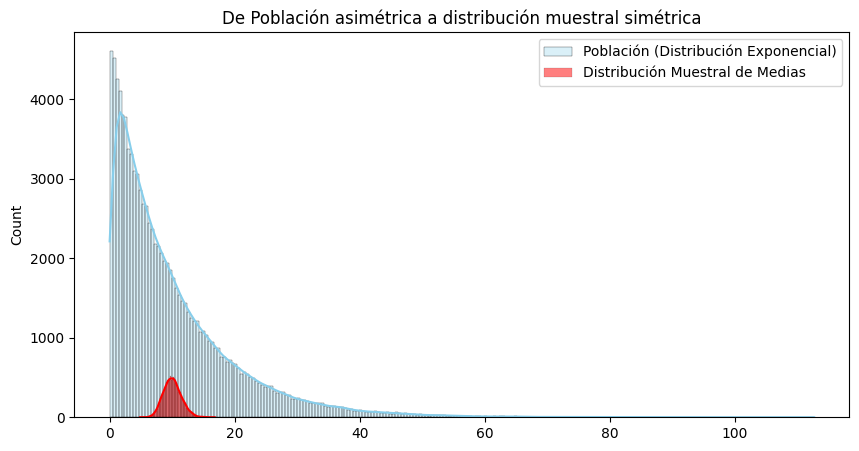

In [5]:
# Veamos este resultado desde un enfoque aplicado

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definamos a nuestra población
poblacion = np.random.exponential(scale=10, size=10**5)

# Simulación de la distribución muestral
tamano_muestra = 50
numero_simulaciones = 10**4
medias_muestrales = []

# Generamos las simulaciones
for _ in range(numero_simulaciones):
    muestra = np.random.choice(poblacion, size=tamano_muestra)
    medias_muestrales.append(np.mean(muestra))

# Visualización
plt.figure(figsize=(10, 5))
sns.histplot(poblacion, kde=True, color='skyblue', alpha = 0.3, label="Población (Distribución Exponencial)")
sns.histplot(medias_muestrales, kde=True, color='red', label = 'Distribución Muestral de Medias')
plt.legend()
plt.title(f'De Población asimétrica a distribución muestral simétrica')
plt.show()

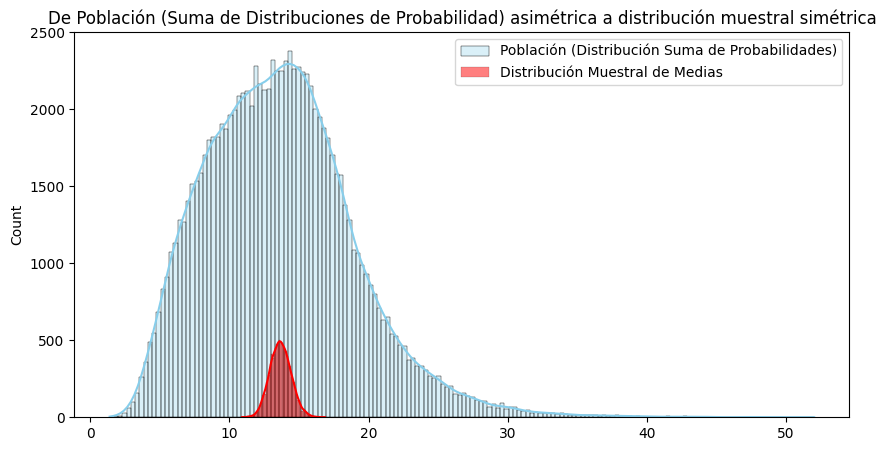

In [15]:
# Podemos mejorar la precisión de la generación de nuestra población

# Parámetro
tamano_poblacion = 10**5

poblacion_X = 3.8*np.random.exponential(size=tamano_poblacion) + 0.3*np.random.gamma(size=tamano_poblacion, shape = 12) + \
              0.1*np.random.vonmises(size=tamano_poblacion, mu = 2.3, kappa = 0.2) + 12.5*np.random.random(size=tamano_poblacion)


# Simulación de la distribución muestral
tamano_muestra = 50
numero_simulaciones = 10**4
medias_muestrales = []

# Generamos las simulaciones
for _ in range(numero_simulaciones):
    muestra = np.random.choice(poblacion_X, size=tamano_muestra)
    medias_muestrales.append(np.mean(muestra))

# Visualización
plt.figure(figsize=(10, 5))
sns.histplot(poblacion_X, kde=True, color='skyblue', alpha = 0.3, label="Población (Distribución Suma de Probabilidades)")
sns.histplot(medias_muestrales, kde=True, color='red', label = 'Distribución Muestral de Medias')
plt.legend()
plt.title(f'De Población (Suma de Distribuciones de Probabilidad) asimétrica a distribución muestral simétrica')
plt.show()

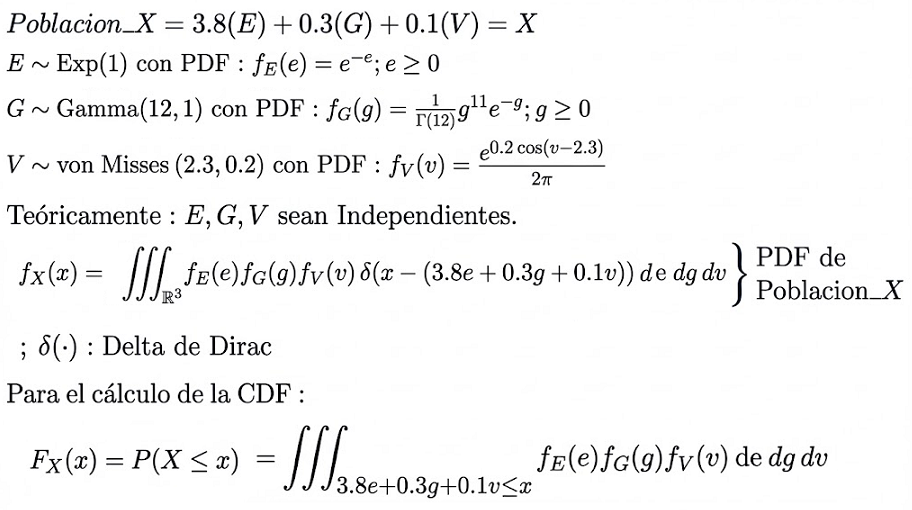

# Teorema del Límite Central (TLC)
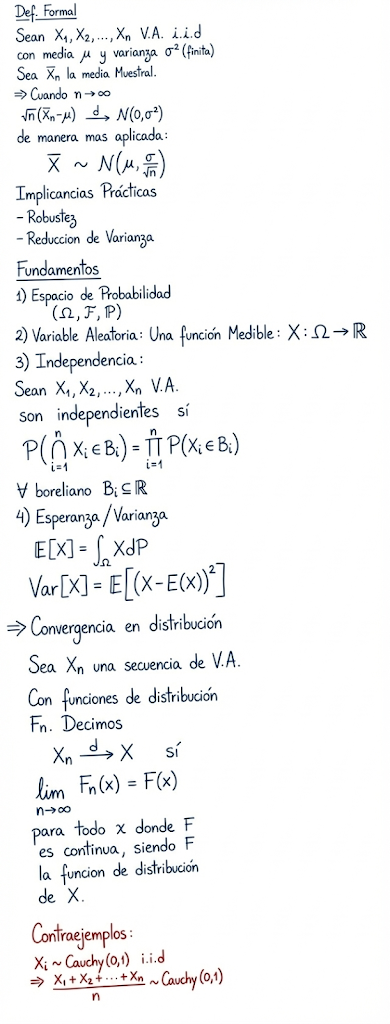

In [16]:
# Verificación numérica del Teorema del Límite Central
# link: https://gist.github.com/robintux/860eb97d9f3b3554cbe438f948016cd7

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def verificar_tlc(distribucion, params, tamano_muestra=10000, n_simulaciones=10000):
    """
    Verificación empírica del Teorema del Límite Central

    Parámetros:
    -----------
    distribucion : función que genera muestras
    params : parámetros de la distribución
    tamano_muestra : tamaño de cada muestra
    n_simulaciones : número de muestras a generar
    """
    # Configuración
    np.random.seed(42)

    # Generar muestras de la distribución original
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # 1. Distribución original
    muestra_original = distribucion(*params, size=10000)
    axes[0, 0].hist(muestra_original, bins=50, density=True, alpha=0.6, color='blue')
    axes[0, 0].set_title('Distribución Original')
    axes[0, 0].set_xlabel('Valor')
    axes[0, 0].set_ylabel('Densidad')

    # Estadísticas de la distribución original
    media_original = np.mean(muestra_original)
    varianza_original = np.var(muestra_original, ddof=1)
    axes[0, 0].axvline(media_original, color='red', linestyle='--',
                      label=f'Media: {media_original:.3f}')
    axes[0, 0].legend()

    # 2. Evolución de la distribución de medias para diferentes n
    tamanos_n = [1, 5, 10, 30, 50, 100]
    medias_muestrales = []

    for i, n in enumerate(tamanos_n):
        # Calcular medias muestrales
        medias = np.array([
            np.mean(distribucion(*params, size=n))
            for _ in range(n_simulaciones)
        ])
        medias_muestrales.append(medias)

        # Normalizar
        media_teorica = np.mean(muestra_original)
        desvio_teorico = np.std(muestra_original) / np.sqrt(n)
        medias_normalizadas = (medias - media_teorica) / desvio_teorico

        # Graficar
        row = (i + 1) // 3
        col = (i + 1) % 3
        if row < 2 and col < 3:
            axes[row, col].hist(medias_normalizadas, bins=50, density=True,
                               alpha=0.6, color='green')

            # Sobreponer distribución normal estándar
            x = np.linspace(-4, 4, 1000)
            axes[row, col].plot(x, stats.norm.pdf(x), 'r-', linewidth=2)

            # Estadísticas de bondad de ajuste
            ks_stat, ks_pvalue = stats.kstest(medias_normalizadas, 'norm')
            axes[row, col].set_title(f'n = {n}\nKS p-value: {ks_pvalue:.4f}')
            axes[row, col].set_xlim(-4, 4)

    plt.suptitle('Verificación del Teorema del Límite Central', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # 3. Análisis cuantitativo de convergencia
    print("="*70)
    print("ANÁLISIS DE CONVERGENCIA AL TLC")
    print("="*70)

    for n, medias in zip(tamanos_n, medias_muestrales):
        if n > 1:
            medias_norm = (medias - media_original) / (np.std(muestra_original)/np.sqrt(n))
            ks_stat, ks_pvalue = stats.kstest(medias_norm, 'norm')
            print(f"n = {n:3d} | KS p-value: {ks_pvalue:.6f} | "
                  f"Sesgo: {stats.skew(medias_norm):.4f} | "
                  f"Curtosis: {stats.kurtosis(medias_norm):.4f}")

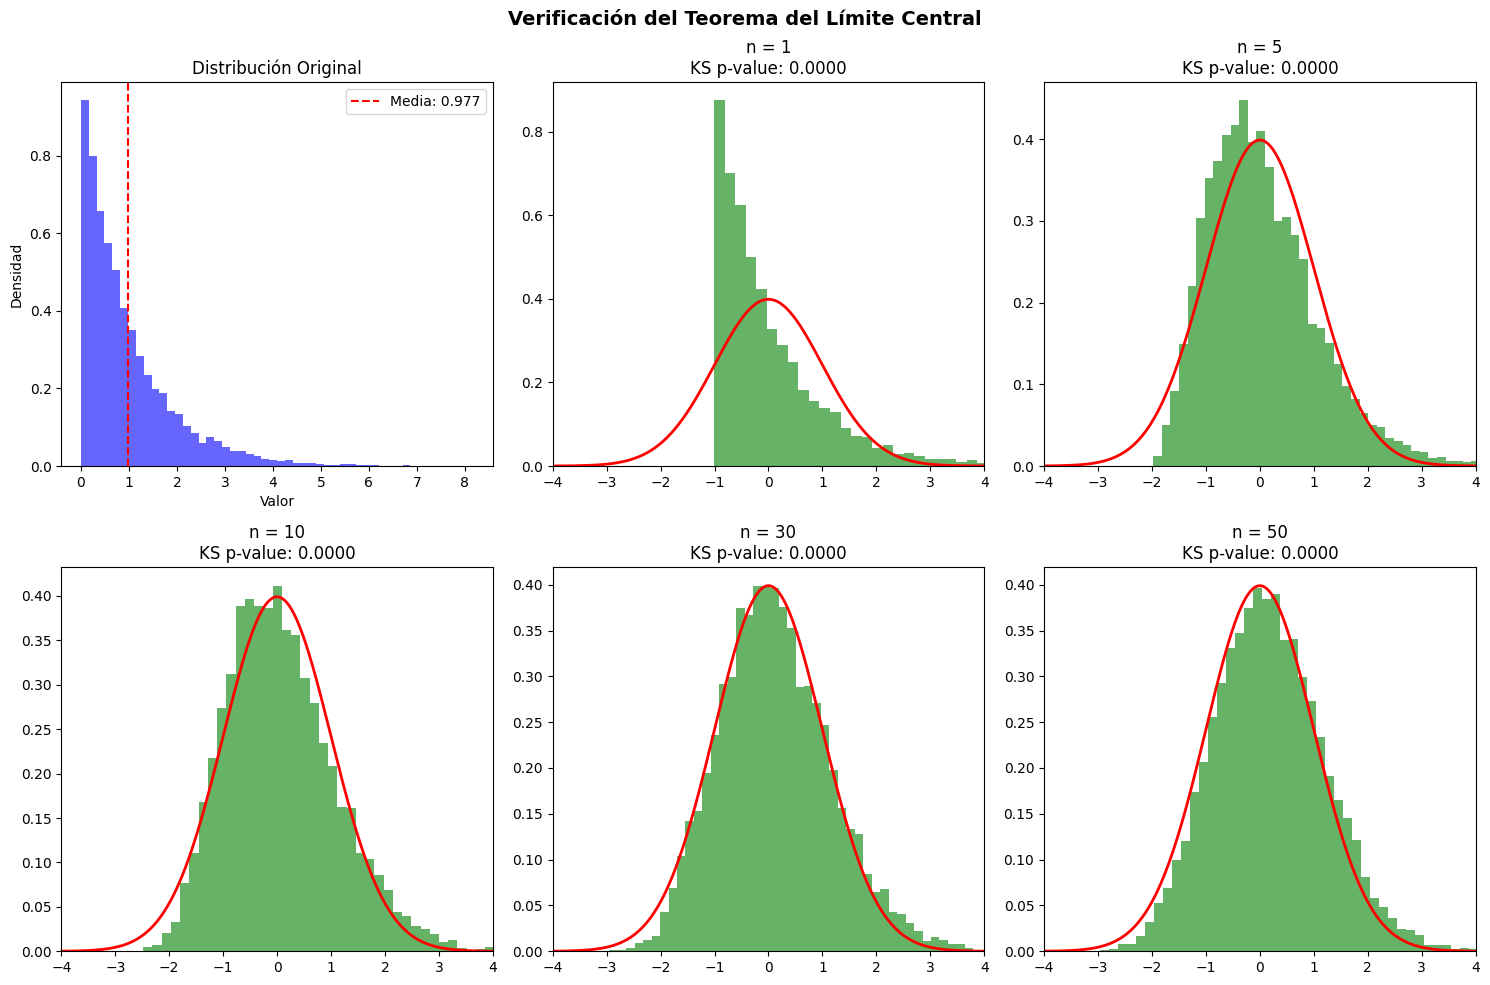

ANÁLISIS DE CONVERGENCIA AL TLC
n =   5 | KS p-value: 0.000000 | Sesgo: 0.8920 | Curtosis: 1.2225
n =  10 | KS p-value: 0.000000 | Sesgo: 0.6144 | Curtosis: 0.5649
n =  30 | KS p-value: 0.000000 | Sesgo: 0.4058 | Curtosis: 0.2538
n =  50 | KS p-value: 0.000000 | Sesgo: 0.2632 | Curtosis: 0.0964
n = 100 | KS p-value: 0.000000 | Sesgo: 0.1989 | Curtosis: -0.0278


In [17]:
# Caso de uso

# Distribución exponencial
verificar_tlc(np.random.exponential, (1,), tamano_muestra=10000, n_simulaciones=10000)

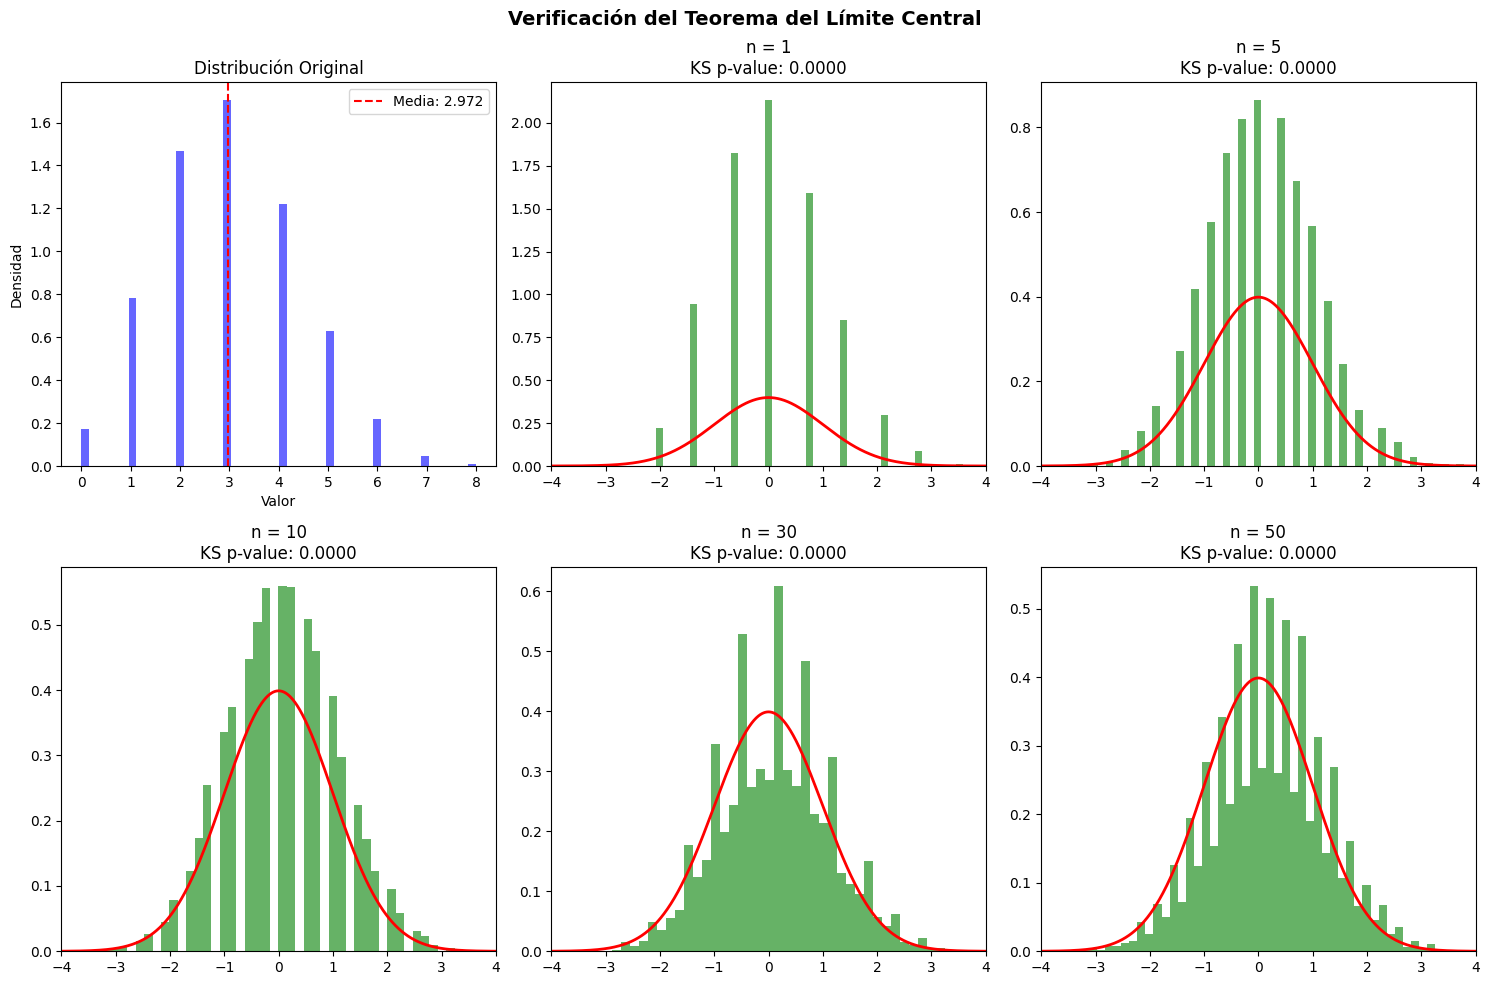

ANÁLISIS DE CONVERGENCIA AL TLC
n =   5 | KS p-value: 0.000000 | Sesgo: 0.1390 | Curtosis: 0.0177
n =  10 | KS p-value: 0.000000 | Sesgo: 0.0616 | Curtosis: -0.0424
n =  30 | KS p-value: 0.000000 | Sesgo: 0.0827 | Curtosis: -0.0406
n =  50 | KS p-value: 0.000000 | Sesgo: 0.0290 | Curtosis: -0.0080
n = 100 | KS p-value: 0.000000 | Sesgo: 0.0283 | Curtosis: -0.1277


In [18]:
# Otro caso de uso: Consideremos una distribución binomial
verificar_tlc(np.random.binomial, (10, 0.3), tamano_muestra=10000, n_simulaciones=10000)

In [20]:
# Análisis de convergencia del TLC

# Link: https://gist.github.com/robintux/5dbf62085a8f15685ad921d2b9f7576a

def analizar_convergencia_tlc(distribuciones, n_max=1000, n_simulaciones=10000):
    """
    Analizar la velocidad de convergencia al TLC para diferentes distribuciones
    """
    resultados = {}

    for nombre, (dist_func, params) in distribuciones.items():
        print(f"\nAnalizando: {nombre}")

        # Parámetros teóricos
        muestras_grandes = dist_func(*params, size=1000000)
        mu = np.mean(muestras_grandes)
        sigma = np.std(muestras_grandes)

        # Medir convergencia para diferentes n
        tamanos_n = np.logspace(np.log10(5), np.log10(n_max), 20).astype(int)
        ks_distancias = []

        for n in tamanos_n:
            medias = np.array([
                np.mean(dist_func(*params, size=n))
                for _ in range(n_simulaciones)
            ])
            medias_norm = (medias - mu) / (sigma / np.sqrt(n))

            # Estadístico KS
            ks_stat, _ = stats.kstest(medias_norm, 'norm')
            ks_distancias.append(ks_stat)

        resultados[nombre] = (tamanos_n, ks_distancias)

        # Regresión para tasa de convergencia
        log_n = np.log(tamanos_n)
        log_ks = np.log(ks_distancias)
        coef = np.polyfit(log_n, log_ks, 1)
        print(f"  Tasa de convergencia: O(n^{coef[0]:.3f})")

    # Visualización
    plt.figure(figsize=(10, 6))
    for nombre, (tamanos_n, ks_distancias) in resultados.items():
        plt.loglog(tamanos_n, ks_distancias, 'o-', label=nombre, alpha=0.7)

    plt.xlabel('Tamaño de muestra (n) - escala log')
    plt.ylabel('Distancia KS - escala log')
    plt.title('Velocidad de Convergencia al TLC para Diferentes Distribuciones')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


Analizando: Uniforme(0,1)
  Tasa de convergencia: O(n^-0.028)

Analizando: Exponencial(1)
  Tasa de convergencia: O(n^-0.311)

Analizando: Gamma(2,1)
  Tasa de convergencia: O(n^-0.290)

Analizando: Bernoulli(0,3)
  Tasa de convergencia: O(n^-0.328)

Analizando: Poisson(3)
  Tasa de convergencia: O(n^-0.389)


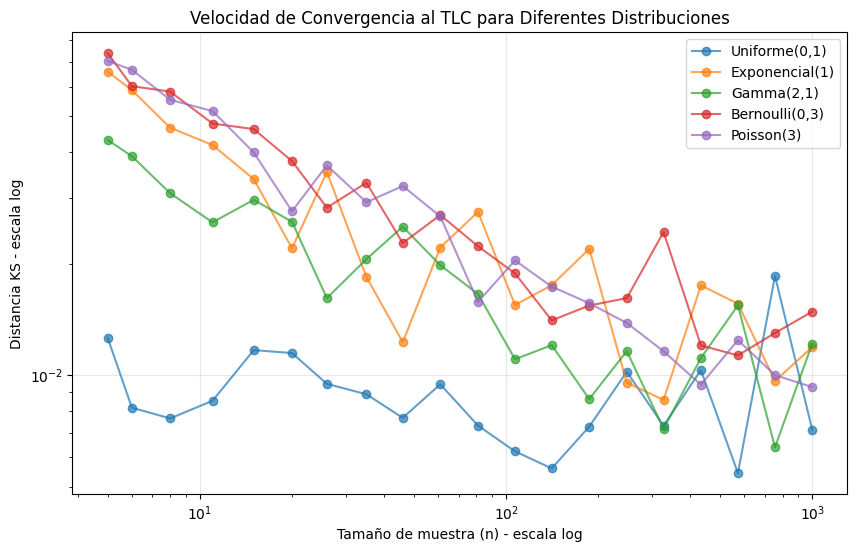

In [21]:
# Definamos las distribuciones a analizar
distribuciones = {
    "Uniforme(0,1)": (np.random.uniform, (0, 1)),
    "Exponencial(1)": (np.random.exponential, (1,)),
    "Gamma(2,1)": (np.random.gamma, (2, 1)),
    "Bernoulli(0,3)": (np.random.binomial, (10, 0.3)),
    "Poisson(3)": (np.random.poisson, (3,))
}

# Llamamos a la función analizar_convergencia_tlc()
analizar_convergencia_tlc(distribuciones)

# Intervalo de Confianza

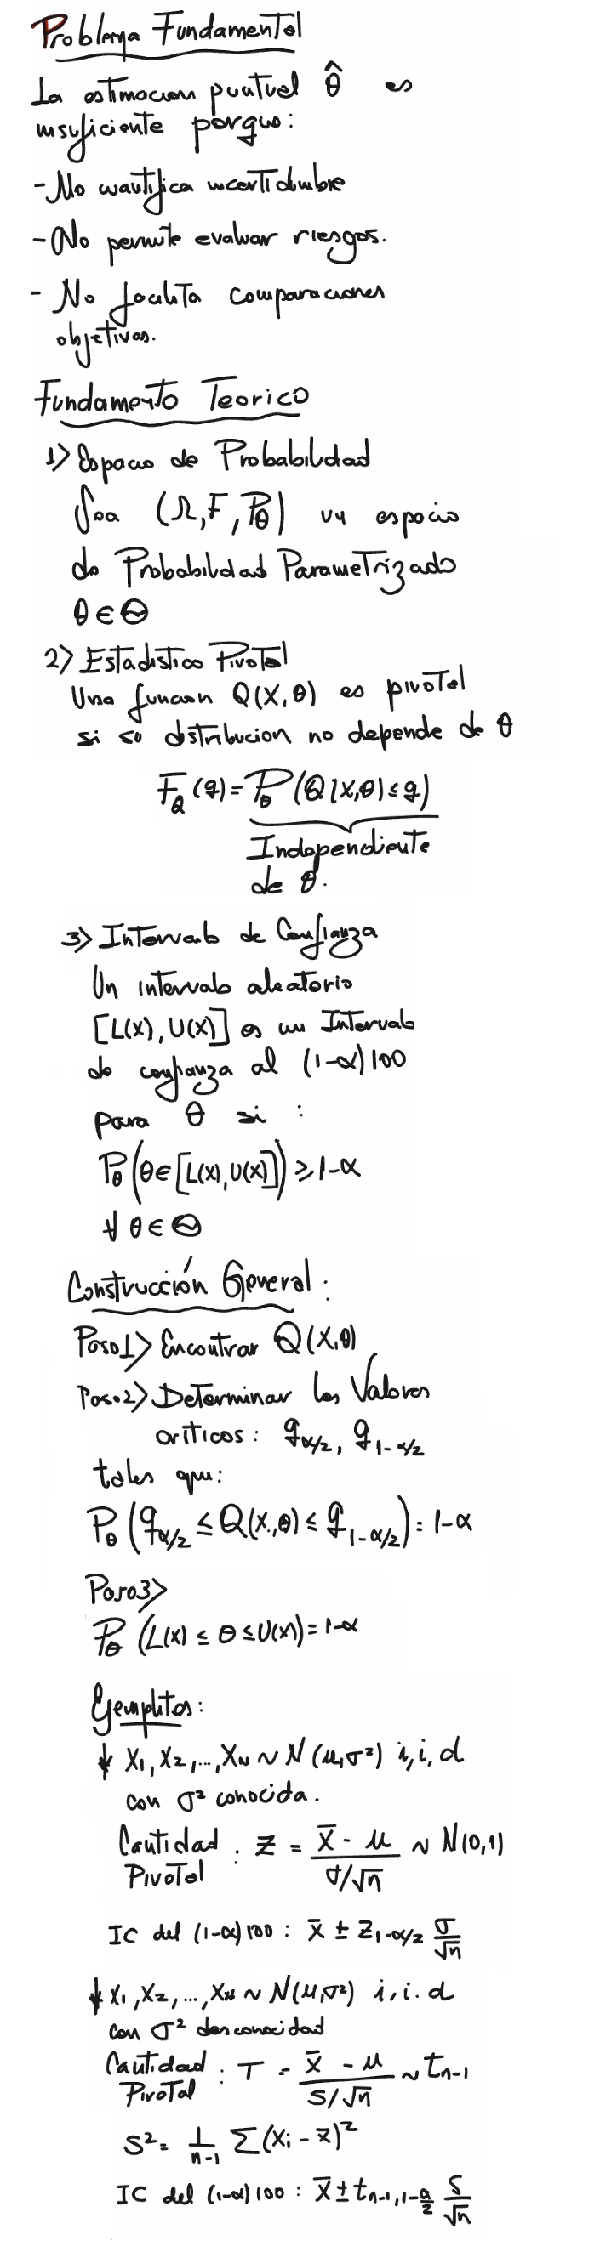

**Fórmula General**

$$
\text({estimador}) \pm (\text{factor_critico}) x (\text{error_estandar})
$$

**Interpretación**

> *INCORRECTO*: Hay un 95%de probabilidad de que el verdadero valor esté en ese intervalo de confianza

> *CORRECTO*: Si repitieramos este experimento infinitas veces y calculáramos el intercalo cada vez, entonces el 95% de esos intervalos contendría al verdadero parámetro.

# Significancia Estadística y P-Values

Aquí entramos en el terreno de toma de decisiones ($H_{0} \text{vs.} H_{1}$)

* *El p-vale expolicado*: Es la probabilidad de obtener un resultado tan extremo o más extremo que el observado, asumiendo que la hipótesis nula ($H_{0}$) es verdadera.

$$
\text{p_value} = P(Datos | H_{0} \text{es verdadera})
$$

**NO ES** la probabilidad de que $H_{0}$ sea falsa  
**NO ES** la probabilidad de que tu hipótesis $H_{1}$ sea cierta



**Analogía Legal**

+ $H_{0}$: El acusado es inocente
+ Datos: Encontramos sus huellas en el arma
* $p-value$: ¿Qué tan probable es encontrar sus huellas si el fuera realmente inocente? (muy baja)
+ Decisión: Como el $p-value$ < Duda razonable ($α = 0.05$), rechazamos la inocencia.